In [1]:
import pandas

In [4]:
ds=pandas.read_csv("Churn_Modelling.csv")

In [5]:
ds.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
#created Y
y=ds["Exited"]

In [7]:
ds.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
#CReate A Feature X
X=ds[['CreditScore',  'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']]

In [10]:
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [11]:
#Data PreProcessing

In [12]:
geo=ds["Geography"]

In [13]:
#Doing the OHE and Removing Dummey Trap
geo=pandas.get_dummies(geo,drop_first=True)

In [14]:
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [16]:
gender=ds["Gender"]

In [17]:
#Doing the OHE and Removing Dummey Trap
gender=pandas.get_dummies(gender,drop_first=True)

In [124]:
gender
#Till Here Data PreProcessing 

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [125]:
#Conconate the gender and geo to X wih Y axis 
X_final=pandas.concat([X,gender,geo],axis=1)

In [126]:
X_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [127]:
#train TEst and SPlit Concept
from sklearn.model_selection import train_test_split

In [128]:
#MOdel 20% isused to test and 80% is used to test
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42)

In [129]:
X_train.shape

(8000, 11)

In [130]:
X_test.shape

(2000, 11)

In [131]:
from keras.models import Sequential

In [132]:
model=Sequential()

In [172]:
from keras.layers import Dense

In [173]:
#ADD layer 1 Dimesion =11 beacuse shape is 11
model.add(Dense(units=10,kernel_initializer="zeros", bias_initializer="zeros",  activation="relu", input_dim=11))

In [174]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_11_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_11',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 10,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_12',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': 

In [175]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                20        
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [176]:
#Layer 2
model.add(Dense(units=8,bias_initializer="zeros",kernel_initializer="zeros", activation="relu"))

In [177]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_11_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_11',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 10,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_12',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': 

In [178]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 88        
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [179]:
#layer 3 activation is relu beacuse it will either give zero or 1 last layers
model.add(Dense(units=1,kernel_initializer="zeros",bias_initializer="zeros",activation="sigmoid"))

In [180]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_11_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_11',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 10,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_12',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_initializer': {'class_name': 'Zeros', 'config': 

In [181]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
Total params: 334
Trainable params: 334
Non-trainable params: 0
________________________________________________________

In [182]:
from keras.optimizers import Adam

In [183]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.000001))

In [184]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
250/250 [==============================] - 2s 2ms/step - loss: 0.6931
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6930
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6929
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6928
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6928
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6927
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6926
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6926
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6925
Epoch 11/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6924
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6924
Epoch 13/50
250/250 [====

In [185]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.,

In [186]:
model.history

In [187]:
model.history.history

{'loss': [0.6931110620498657,
  0.6930391788482666,
  0.6929680705070496,
  0.692896842956543,
  0.6928256154060364,
  0.6927541494369507,
  0.6926829218864441,
  0.6926114559173584,
  0.6925401091575623,
  0.6924688220024109,
  0.6923969984054565,
  0.692326009273529,
  0.6922545433044434,
  0.6921836137771606,
  0.692112147808075,
  0.6920406818389893,
  0.6919698715209961,
  0.6918985247612,
  0.6918272972106934,
  0.6917563080787659,
  0.6916850209236145,
  0.6916137337684631,
  0.6915432810783386,
  0.6914719343185425,
  0.6914011240005493,
  0.6913297176361084,
  0.6912588477134705,
  0.691187858581543,
  0.6911166310310364,
  0.6910455822944641,
  0.6909746527671814,
  0.6909033060073853,
  0.6908320784568787,
  0.690761148929596,
  0.6906899809837341,
  0.6906192302703857,
  0.6905480623245239,
  0.6904772520065308,
  0.6904062628746033,
  0.6903351545333862,
  0.6902642250061035,
  0.6901930570602417,
  0.6901226043701172,
  0.6900514364242554,
  0.6899805665016174,
  0.689910

In [188]:
l=pandas.DataFrame(model.history.history)

<AxesSubplot:>

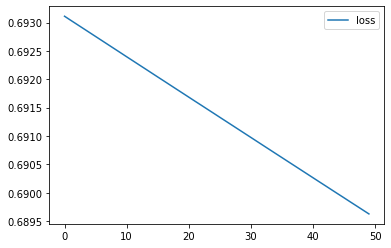

In [189]:
l.plot()